# 資料準備

In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist

In [5]:
(x_train_image, y_train_label), \
(x_test_image, y_test_label) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [6]:
print('train data=',len(x_train_image))
print(' test data=',len(x_test_image))

train data= 60000
 test data= 10000


In [7]:
print ('x_train_image:',x_train_image.shape)
print ('y_train_label:',y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [0]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    plt.axis('off')
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

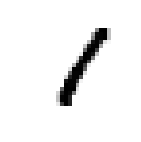

In [35]:
plot_image(x_train_image[3])
fig = plt.figure(frameon=False)

In [10]:
y_train_label[0]

5

In [0]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    ind=[0,1,2,3,4,5,7,13,15,17]
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    
    for i in range(0,10):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[ind[i]], cmap='binary')
        title= "label=" +str(labels[ind[i]])
        if len(prediction)>0:
            title+=",predict="+str(prediction[ind[i]]) 
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([]) 
        idx+=1 
        
    plt.show()

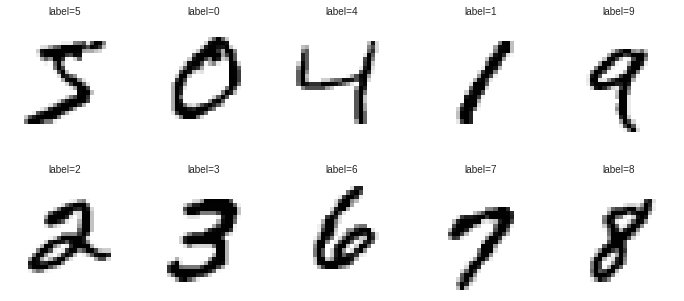

In [131]:


plot_images_labels_prediction(x_train_image,y_train_label,[],0,20)



In [17]:
print ('x_test_image:',x_test_image.shape)
print ('y_test_label:',y_test_label.shape)

x_test_image: (10000, 28, 28)
y_test_label: (10000,)


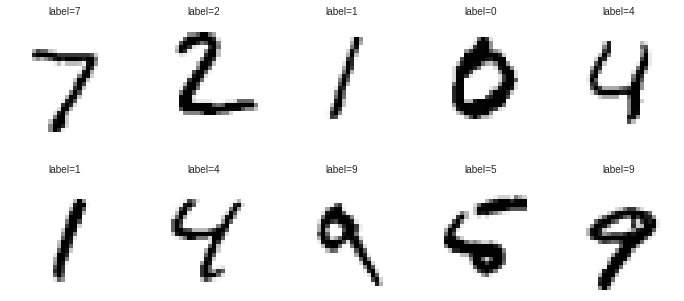

In [18]:
plot_images_labels_prediction(x_test_image,y_test_label,[],0,10)

# 將images進行預處理

In [19]:
print ('x_train_image:',x_train_image.shape)
print ('y_train_label:',y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [0]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [21]:
print ('x_train:',x_Train.shape)
print ('x_test:',x_Test.shape)

x_train: (60000, 784)
x_test: (10000, 784)


In [22]:
x_train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [0]:
x_Train_normalize = x_Train/ 255
x_Test_normalize = x_Test/ 255

In [0]:
x_Train_normalize[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

# one hot encode outputs

In [0]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [0]:
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

In [0]:
y_TrainOneHot[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])